Converged after 130 epochs


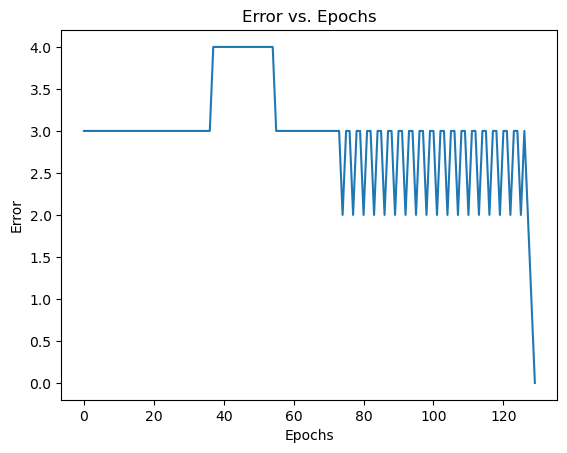

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # W0, W1, W2
learning_rate = 0.05
epochs = 1000

#lists to store errors
errors = []
#lists to store epochs
epoch_numbers = []

def step_activation(x):
    return 1 if x >= 0 else 0
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]
        # step activation function
        prediction = step_activation(weighted_sum)
        # Calculate the error
        error = error + (Y[i] - prediction) ** 2
        # Update weights
        W[1:] = W[1:] + learning_rate * (Y[i] - prediction) * X[i]
        W[0] = W[0] + learning_rate * (Y[i] - prediction)
    
    # Append error and epoch number for plotting
    errors.append(error)
    epoch_numbers.append(epoch)
    
    # convergence
    if error <= 0.002:
        print(f"Converged after {epoch + 1} epochs")
        break

# Plotting error vs. epoch
plt.plot(epoch_numbers, errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()


Converged with ReLU after 390 epochs


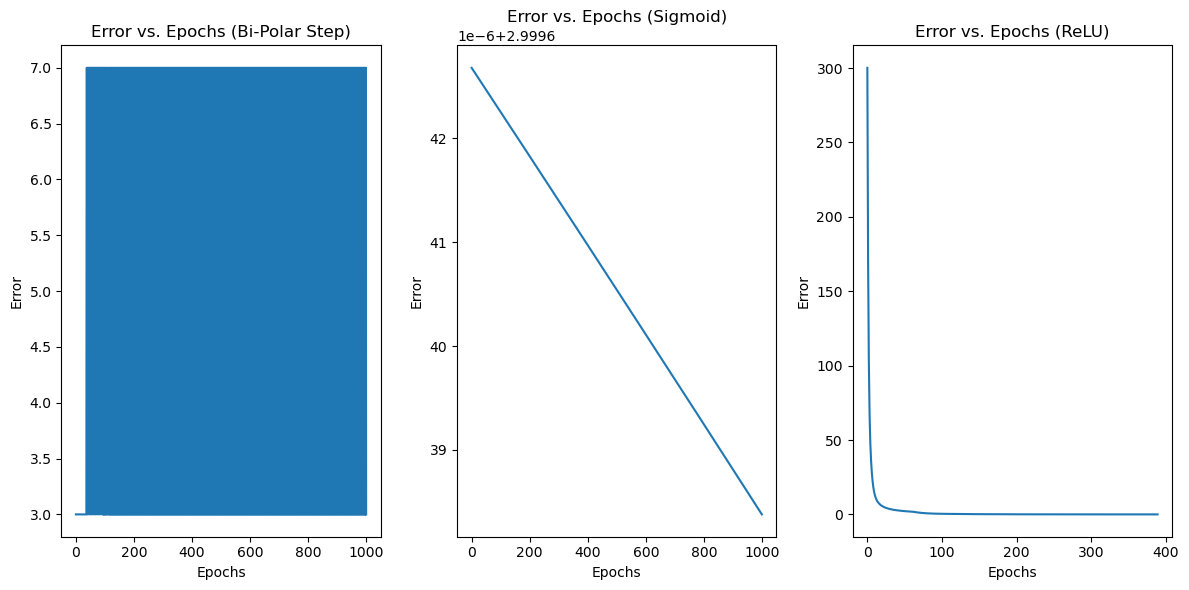

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # W0, W1, W2
learning_rate = 0.05
epochs = 1000

# Initialize lists to store errors and epoch numbers for each activation function
errors_step = []
epoch_numbers_step = []
errors_sigmoid = []
epoch_numbers_sigmoid = []
errors_relu = []
epoch_numbers_relu = []

# Define the Bi-Polar Step activation function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Define the Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Define the ReLU activation function
def relu_activation(x):
    return max(0, x)

# Training the perceptron with Bi-Polar Step activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]
        
        # Apply the Bi-Polar Step activation function
        prediction = bipolar_step_activation(weighted_sum)
        
        # Calculate the error
        error = error + (Y[i] - prediction) ** 2
        
        # Update weights
        W[1:] = W[1:] + learning_rate * (Y[i] - prediction) * X[i]
        W[0] = W[0] + learning_rate * (Y[i] - prediction)
    
    # Append error and epoch number for plotting
    errors_step.append(error)
    epoch_numbers_step.append(epoch)
    
    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Bi-Polar Step after {epoch + 1} epochs")
        break

# Reinitialize weights for Sigmoid and ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with Sigmoid activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]
        
        # Apply the Sigmoid activation function
        prediction = sigmoid_activation(weighted_sum)
        
        # Calculate the error
        error = error + (Y[i] - prediction) ** 2
        
        # Update weights
        delta = learning_rate * (Y[i] - prediction) * prediction * (1 - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta
    
    # Append error and epoch number for plotting
    errors_sigmoid.append(error)
    epoch_numbers_sigmoid.append(epoch)
    
    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Sigmoid after {epoch + 1} epochs")
        break

# Reinitialize weights for ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with ReLU activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]
        
        # Apply the ReLU activation function
        prediction = relu_activation(weighted_sum)
        
        # Calculate the error
        error = error + (Y[i] - prediction) ** 2
        
        # Update weights
        delta = learning_rate * (Y[i] - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta
    
    # Append error and epoch number for plotting
    errors_relu.append(error)
    epoch_numbers_relu.append(epoch)
    
    # Check for convergence
    if error <= 0.002:
        print(f"Converged with ReLU after {epoch + 1} epochs")
        break

# Plotting error vs. epoch for all activation functions
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epoch_numbers_step, errors_step)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Bi-Polar Step)')

plt.subplot(132)
plt.plot(epoch_numbers_sigmoid, errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Sigmoid)')

plt.subplot(133)
plt.plot(epoch_numbers_relu, errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (ReLU)')

plt.tight_layout()
plt.show()


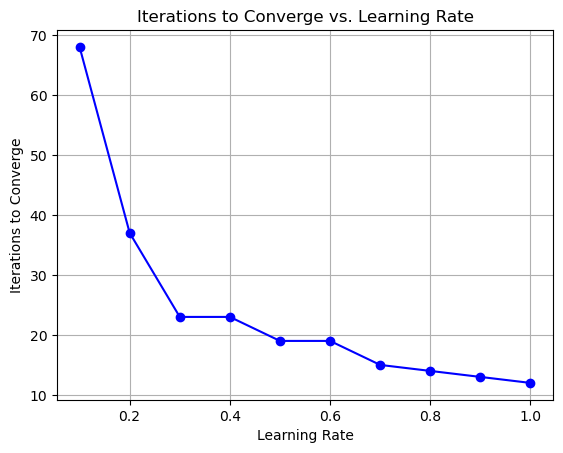

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # W0, W1, W2
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_epochs = 1000

# Initialize a list to store the number of iterations for convergence
iterations_to_converge = []

# Define the step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Training the perceptron for different learning rates
for learning_rate in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reinitialize weights for each learning rate
    for epoch in range(max_epochs):
        error = 0
        for i in range(len(X)):
            # Calculate the weighted sum
            weighted_sum = np.dot(X[i], W[1:]) + W[0]
            
            # Apply the step activation function
            prediction = step_activation(weighted_sum)
            
            # Calculate the error
            error = error + (Y[i] - prediction) ** 2
            
            # Update weights
            W[1:] = W[1:] + learning_rate * (Y[i] - prediction) * X[i]
            W[0] = W[0] + learning_rate * (Y[i] - prediction)
        
        # Check for convergence
        if error <= 0.002:
            iterations_to_converge.append(epoch + 1)
            break

# Plotting learning rate vs. iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs. Learning Rate')
plt.grid(True)
plt.show()


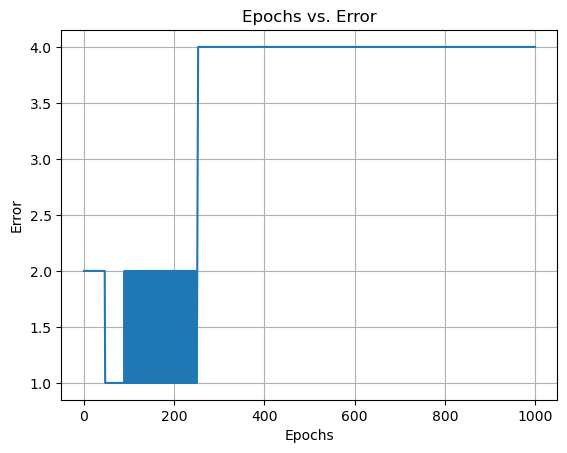

Final Weights: [ 0.1 -0.1 -0.1]
Number of Epochs: 1000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights and learning rate
W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Define the XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize variables for tracking epochs and errors
epochs = 0
error_values = []

# Define the step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training loop
while True:
    error = 0
    for i in range(len(X)):
        # Calculate the predicted output
        input_vector = np.insert(X[i], 0, 1)  # Adding bias input
        net_input = np.dot(W, input_vector)
        output = step_function(net_input)

        # Calculate the error
        delta = y[i] - output

        # Update weights
        W += learning_rate * delta * input_vector

        error += delta**2

    error_values.append(error)
    epochs += 1

    # Check for convergence condition
    if error <= 0.002:
        break

    # Check for maximum epochs
    if epochs >= 1000:
        break

# Plotting epochs vs. error values
plt.plot(range(epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()

# Print the final weights and number of epochs
print("Final Weights:", W)
print("Number of Epochs:", epochs)


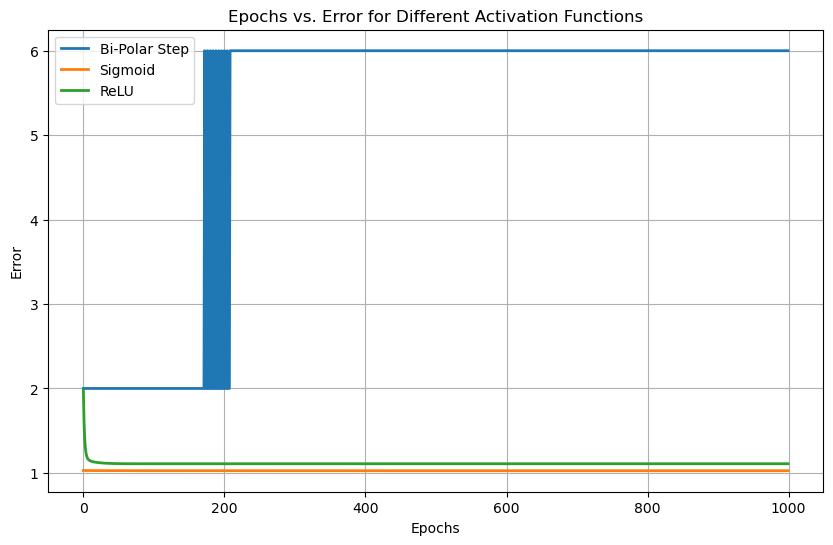

Number of Epochs (Bi-Polar Step): 1000
Number of Epochs (Sigmoid): 1000
Number of Epochs (ReLU): 1000


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights and learning rate
W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Define the XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize variables for tracking epochs and errors
epochs_step = 0
epochs_sigmoid = 0
epochs_relu = 0
error_values_step = []
error_values_sigmoid = []
error_values_relu = []

# Define activation functions

# Bi-Polar Step function
def bipolar_step_function(x):
    return -1 if x < 0 else 1

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return max(0, x)

# Training loop for Bi-Polar Step
while True:
    error_step = 0
    for i in range(len(X)):
        input_vector = np.insert(X[i], 0, 1)  # Adding bias input
        net_input = np.dot(W, input_vector)
        output = bipolar_step_function(net_input)
        delta = y[i] - output
        W += learning_rate * delta * input_vector
        error_step += delta**2
    error_values_step.append(error_step)
    epochs_step += 1
    if error_step <= 0.002:
        break
    if epochs_step >= 1000:
        break

# Training loop for Sigmoid
while True:
    error_sigmoid = 0
    for i in range(len(X)):
        input_vector = np.insert(X[i], 0, 1)  # Adding bias input
        net_input = np.dot(W, input_vector)
        output = sigmoid(net_input)
        delta = y[i] - output
        W += learning_rate * delta * input_vector
        error_sigmoid += delta**2
    error_values_sigmoid.append(error_sigmoid)
    epochs_sigmoid += 1
    if error_sigmoid <= 0.002:
        break
    if epochs_sigmoid >= 1000:
        break

# Training loop for ReLU
while True:
    error_relu = 0
    for i in range(len(X)):
        input_vector = np.insert(X[i], 0, 1)  # Adding bias input
        net_input = np.dot(W, input_vector)
        output = relu(net_input)
        delta = y[i] - output
        W += learning_rate * delta * input_vector
        error_relu += delta**2
    error_values_relu.append(error_relu)
    epochs_relu += 1
    if error_relu <= 0.002:
        break
    if epochs_relu >= 1000:
        break

# Plotting epochs vs. error values for each activation function
plt.figure(figsize=(10, 6))
plt.plot(range(epochs_step), error_values_step, label='Bi-Polar Step', linewidth=2)
plt.plot(range(epochs_sigmoid), error_values_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(range(epochs_relu), error_values_relu, label='ReLU', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of epochs for each activation function to converge
print("Number of Epochs (Bi-Polar Step):", epochs_step)
print("Number of Epochs (Sigmoid):", epochs_sigmoid)
print("Number of Epochs (ReLU):", epochs_relu)


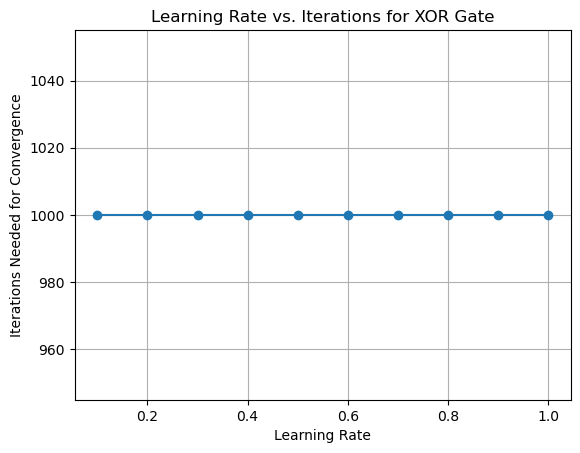

Learning Rate: 0.1, Iterations Needed: 1000
Learning Rate: 0.2, Iterations Needed: 1000
Learning Rate: 0.3, Iterations Needed: 1000
Learning Rate: 0.4, Iterations Needed: 1000
Learning Rate: 0.5, Iterations Needed: 1000
Learning Rate: 0.6, Iterations Needed: 1000
Learning Rate: 0.7, Iterations Needed: 1000
Learning Rate: 0.8, Iterations Needed: 1000
Learning Rate: 0.9, Iterations Needed: 1000
Learning Rate: 1, Iterations Needed: 1000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights
W = np.array([10, 0.2, -0.75])

# Define the XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize variables for tracking the number of iterations
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_needed = []

# Define the step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training loop for each learning rate
for learning_rate in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each learning rate
    epochs = 0

    while True:
        error = 0
        for i in range(len(X)):
            # Calculate the predicted output
            input_vector = np.insert(X[i], 0, 1)  # Adding bias input
            net_input = np.dot(W, input_vector)
            output = step_function(net_input)

            # Calculate the error
            delta = y[i] - output

            # Update weights
            W += learning_rate * delta * input_vector

            error += delta**2

        epochs += 1

        # Check for convergence condition
        if error <= 0.002:
            break

        # Check for maximum epochs
        if epochs >= 1000:
            break

    iterations_needed.append(epochs)

# Plotting learning rates vs. number of iterations
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Learning Rate vs. Iterations for XOR Gate')
plt.grid(True)
plt.show()

# Print the number of iterations needed for each learning rate
for i, rate in enumerate(learning_rates):
    print(f"Learning Rate: {rate}, Iterations Needed: {iterations_needed[i]}")


In [14]:
import numpy as np
import pandas as pd

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and bias
np.random.seed(0)
weights = np.random.rand(4)  # 4 weights for 4 numerical columns (excluding 'High Value Tx?')
bias = 0
learning_rate = 0.01
epochs = 1000

# Load and preprocess the dataset from an Excel sheet
data = pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\Customer.xlsx")

# Convert numerical columns to numeric types
numeric_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

# Map 'High Value Tx?' column to integers (1 for 'yes' and 0 for 'no')
data['High Value Tx?'] = data['High Value Tx?'].map({'yes': 1, 'no': 0})

# Extract feature matrix (X) and target variable (Y)
X = data[numeric_columns].values
Y = data['High Value Tx?'].values

# Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        # Forward pass
        z = np.dot(X[i], weights) + bias
        output = sigmoid(z)
        
        # Compute error
        error = Y[i] - output
        
        # Update weights and bias
        weights += learning_rate * error * output * (1 - output) * X[i]
        bias += learning_rate * error * output * (1 - output)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {np.mean(np.square(error)):.4f}')

print("Training complete.")

# You can now use the trained perceptron to make predictions on new data.


Epoch 100/1000, Loss: nan
Epoch 200/1000, Loss: nan
Epoch 300/1000, Loss: nan
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Training complete.


In [15]:
import numpy as np

# Step 1: Initialize the network
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.05
iterations = 1000

# Initialize weights with random values
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Step 2: Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 3: Create a training dataset for the AND gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Step 4-7: Training the neural network
for i in range(iterations):
    # Step 4: Forward propagation
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    output = sigmoid(np.dot(hidden_output, weights_hidden_output))

    # Step 5: Calculate the error
    error = y - output

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Converged after {i} iterations.")
        break

    # Step 6: Backward propagation
    d_output = error * sigmoid_derivative(output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate

# Step 7: Testing the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden)), weights_hidden_output))
print("Predicted output:")
print(predicted_output)


Predicted output:
[[0.30160961]
 [0.27313873]
 [0.27314494]
 [0.24788005]]
